In [5]:
#Gradient Descent Lab
#Chris Rytting

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# =============================================
#
# load cifar-10-small and project down
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# ===============================================
#Make one line
def linear_score(W):
    return W.dot(features.T)

def loss_function(W):
    scores = linear_score(W)
    P = np.exp(scores) / np.sum( np.exp(scores), axis=0)
    losses = P[labels.flatten(), range(0,P.shape[1])]
    loss = -1 * np.log(losses)
    return np.mean(loss)


W = np.random.normal(0,.001,(D,D + 1))
features = np.hstack((features, np.ones((np.shape(features)[0],1))))

loss_function(W)




def numerical_gradient(loss_function, W, h = .000001):
    gradient = np.zeros(np.shape(W))
    (loss_function(W + h) - loss_function(W))/ float(h) 
    for i in xrange(W.shape[0]):
        for j in xrange(W.shape[1]):
            W_temp = np.copy(W)
            W_temp[i][j] += h
            #loss vs. softmax??
            gradient[i][j] = (loss_function(W_temp) - loss_function(W))/h

    return loss_function(W), gradient

loss = []
accuracy = []

In [6]:
NUM_EPOCHS = 1000
step_size = 0.1
for i in range(0,NUM_EPOCHS):
    loss_function_value, grad = numerical_gradient(loss_function, W)
    W = W - step_size * grad
    loss.append(loss_function(W))
    all_scores = linear_score(W)
    cats = np.argmax(all_scores, axis=0).flatten()
    acc = float(np.sum(np.isclose(labels.flatten(), cats))) / len(labels)
    accuracy.append(acc)

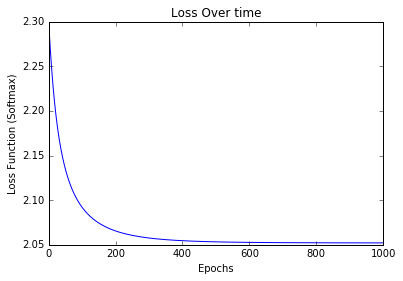

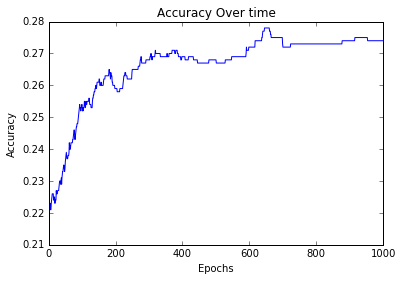

In [7]:
t = np.linspace(1,1000,1000)
plt.plot(t, loss)
plt.title("Loss Over time")
plt.xlabel("Epochs")
plt.ylabel("Loss Function (Softmax)")
plt.show()

plt.plot(t, acc_hist)
plt.title("Accuracy Over time")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()